<a href="https://colab.research.google.com/github/naikshrey2308/ML_Labs/blob/main/ML_Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn import datasets

SVM with Linear kernal (Blob dataset)

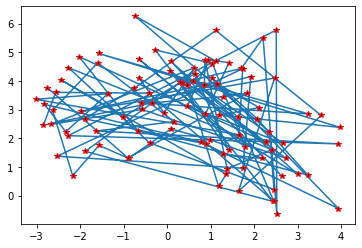

In [16]:
X , y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
df = pd.DataFrame(X, columns = ['X','Y'])
plt.plot(df['X'],df['Y'], marker="*", markersize=6, markeredgecolor="red", markerfacecolor="black")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
svmClassifier = svm.SVC(C=2,kernel='linear')
svmClassifier.fit(X_train,y_train)

y_pred = svmClassifier.predict(X_test)

precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')


(0.95, 0.95, 0.95, 0.9500000000000001)

In [19]:
print("Accuracy: {}%".format(svmClassifier.score(X_test, y_test) * 100))

Accuracy: 95.0%


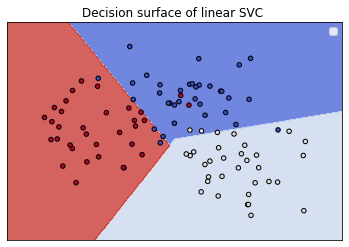

In [20]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = svmClassifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svmClassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y , cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Breast cancer dataset

In [21]:
Cancer = datasets.load_breast_cancer(return_X_y=0)
print(Cancer.feature_names , Cancer.target_names)
X = pd.DataFrame(Cancer.data,columns=Cancer.feature_names)
Y = Cancer.target
X

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


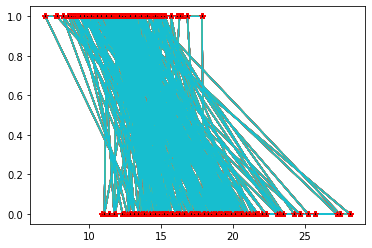

In [24]:
from matplotlib import colors
for i in Cancer.feature_names:
 plt.plot(X['mean radius'],Y, marker="*", markersize=6, markeredgecolor='red', markerfacecolor="black")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

svmClassifierLinear = svm.SVC(C=2,kernel='linear')
svmClassifierLinear.fit(X_train,y_train)
y_pred = svmClassifierLinear.predict(X_test)


precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')


(0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193)

MNIST Dataset 

In [26]:
X_mnist,y_mnist = datasets.load_digits(return_X_y=1)

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)


svmClassifierLinear = svm.SVC(C=2,kernel='linear')

svmClassifierPoly = svm.SVC(C=2,kernel='poly')

svmClassifierRBF = svm.SVC(C=2,kernel='rbf')


svmClassifierLinear.fit(X_train,y_train)

svmClassifierPoly.fit(X_train,y_train)

svmClassifierRBF.fit(X_train,y_train)


y_pred_linear = svmClassifierLinear.predict(X_test)

y_pred_poly = svmClassifierPoly.predict(X_test)

y_pred_rbf = svmClassifierRBF.predict(X_test)


print(precision_score(y_test, y_pred_linear,average='micro'), accuracy_score(y_test,  y_pred_linear), recall_score(y_test,  y_pred_linear,average='micro'), f1_score(y_test,  y_pred_linear,average='micro'))

print(precision_score(y_test, y_pred_poly,average='micro'), accuracy_score(y_test,  y_pred_poly), recall_score(y_test,  y_pred_poly,average='micro'), f1_score(y_test,  y_pred_poly,average='micro'))

print(precision_score(y_test, y_pred_rbf,average='micro'), accuracy_score(y_test,  y_pred_rbf), recall_score(y_test,  y_pred_rbf,average='micro'), f1_score(y_test,  y_pred_rbf,average='micro'))



0.9777777777777777 0.9777777777777777 0.9777777777777777 0.9777777777777777
0.9861111111111112 0.9861111111111112 0.9861111111111112 0.9861111111111112
0.9888888888888889 0.9888888888888889 0.9888888888888889 0.9888888888888889
